Autor: Martín de las Heras

## Práctica 1

Importamos *pandas* como herramienta para el procesado de datos

In [1]:
import pandas as pd

Leemos del fichero ``contac_center_data`` los datos, especificando un separador distinto a la coma

In [2]:
contact_center = pd.read_csv('contac_center_data.csv', sep=';')
contact_center

,sessionID,DNI,Telef,CP,duration_call_mins,funnel_Q,Producto
0,b'MC4zNTIyMjkyODczNzI4ODQ5NQ==',X61734151,632566551,28066,2.485994,Chalet,NaN
1,b'MC4zNTIyMjkyODczNzI4ODQ5NQ==',X61734151,632566551,28066,2.485994,Unifamiliar,NaN
2,b'MC4zNTIyMjkyODczNzI4ODQ5NQ==',X61734151,632566551,28066,2.485994,Sin Rejas,NaN
3,b'MC42NzQyNzE3NzczMDMyODM1',X61588112,646319047,28974,2.559412,Chalet,NaN
4,b'MC42NzQyNzE3NzczMDMyODM1',X61588112,646319047,28974,2.559412,Unifamiliar,NaN
...,...,...,...,...,...,...,...
30992,b'MC4wNzU3MTEyMjIyOTQ4NDgwNg==',X10805958,687384314,28560,17.472462,Unifamiliar,Home Premium
30993,b'MC4wNzU3MTEyMjIyOTQ4NDgwNg==',X10805958,687384314,28560,17.472462,Con Rejas,Home Premium
30994,NaN,X10805958,687384314,28560,17.472462,Chalet,Home Premium
30995,NaN,X10805958,687384314,28560,17.472462,Unifamiliar,Home Premium


Calculamos los valores **na** que hay por columna, para saber qué datos nos faltan

In [3]:
contact_center.isna().sum()

sessionID                 3
DNI                       0
Telef                     0
CP                        0
duration_call_mins        0
funnel_Q                  0
Producto              20605
dtype: int64

Eliminamos las tres últimas filas, ya que se trata de datos repetidos

In [4]:
contact_center.drop(contact_center.tail(3).index,inplace=True)

A continuación, la columna ``funnel_Q``, la dividimos en 5 columnas distintas en función de las características de la vivienda que tenga:
* Si es casa o piso
* En caso de que sea piso, si es bajo o intermedio
* En caso de que sea casa, si es adosado o unifamiliar
* Si tiene rejas o no
* Si tiene perro o no

Para evitar problemas con filas eliminadas, sustituimos los valores ``NaN`` de la columna ``Producto``.

In [5]:
contact_center.fillna('', inplace=True)
contact_center = contact_center.pivot_table(index=['sessionID','DNI','Telef','CP','duration_call_mins','Producto'], aggfunc=lambda x: ','.join(x))
contact_center.reset_index(inplace=True)

contact_center['chalet/piso'] = contact_center['funnel_Q'].apply(lambda x: 'Chalet' if 'Chalet' in x else 'Piso' if 'Piso' in x else '')
contact_center['bajo/intermedio'] = contact_center['funnel_Q'].apply(lambda x: 'Bajo' if 'Bajo' in x else 'Intermedio' if 'Intermedio' in x else '')
contact_center['adosado/unifamiliar'] = contact_center['funnel_Q'].apply(lambda x: 'Adosado' if 'Adosado' in x else 'Unifamiliar' if 'Unifamiliar' in x else '')
contact_center['rejas'] = contact_center['funnel_Q'].apply(lambda x: 'Con Rejas' if 'Con Rejas' in x else 'Sin Rejas' if 'Sin Rejas' in x else '')
contact_center['perro'] = contact_center['funnel_Q'].apply(lambda x: 'Con Perro' if 'Con Perro' in x else 'Sin Perro' if 'Sin Perro' in x else '')

contact_center.drop('funnel_Q', inplace=True, axis=1)
contact_center

,sessionID,DNI,Telef,CP,duration_call_mins,Producto,chalet/piso,bajo/intermedio,adosado/unifamiliar,rejas,perro
0,b'MC40MDA1NDM0MzY5MzYyODE4',X88537286,671483480,28520,13.481688,Home Premium Plus,Chalet,,Unifamiliar,Sin Rejas,
1,b'MC40MDA2OTkxNDAyNzA5Nzcz',X67868023,669613626,28758,7.066443,,Chalet,,Adosado,Con Rejas,
2,b'MC40MDA5Mzc0NTc5MzM5OTAxNg==',X22379422,688974839,28001,14.197395,Home Premium,Piso,Bajo,,Con Rejas,Con Perro
3,b'MC40MDA5MzgwNDg5NzU2ODM2NA==',X95888915,604709311,28678,6.940735,,Piso,Bajo,,Con Rejas,Sin Perro
4,b'MC40MDA5NjA1MDcwNjY2MzQ1NQ==',X76422588,610413816,28881,5.674006,,Piso,Bajo,,Sin Rejas,Sin Perro
...,...,...,...,...,...,...,...,...,...,...,...
9074,b'MC4zOTk1NTQ5NzkzMzQ3MDMz',X06532415,636434625,28177,6.745911,,Piso,Bajo,,Sin Rejas,Sin Perro
9075,b'MC4zOTk1Nzk0NDIwMTIzMjM=',X81981617,694267270,28353,14.190246,,Chalet,,Adosado,Sin Rejas,
9076,b'MC4zOTk3ODQ2Nzg2MDQ5OTAx',X61164682,617245792,28213,5.585495,,Piso,Bajo,,Con Rejas,Sin Perro
9077,b'MC4zOTkwNzA5Mzg2MzE3NDE1',X48507215,647430903,28112,4.961994,,Piso,Bajo,,Con Rejas,Sin Perro


In [6]:
contact_center.isna().sum()

sessionID              0
DNI                    0
Telef                  0
CP                     0
duration_call_mins     0
Producto               0
chalet/piso            0
bajo/intermedio        0
adosado/unifamiliar    0
rejas                  0
perro                  0
dtype: int64

Leemos del segundo fichero los datos, de la misma manera que antes

In [7]:
renta_por_hogar = pd.read_csv('renta_por_hogar.csv', sep=';')
renta_por_hogar

,Municipios,Distritos,Secciones,Indicadores de renta media y mediana,Periodo,Total
0,"28001 Acebeda, La",NaN,NaN,Renta neta media por persona,2020,13.999
1,"28001 Acebeda, La",NaN,NaN,Renta neta media por persona,2019,.
2,"28001 Acebeda, La",NaN,NaN,Renta neta media por persona,2018,.
3,"28001 Acebeda, La",NaN,NaN,Renta neta media por persona,2017,.
4,"28001 Acebeda, La",NaN,NaN,Renta neta media por persona,2016,.
...,...,...,...,...,...,...
175063,28903 Tres Cantos,2890301 Tres Cantos distrito 01,2890301025 Tres Cantos sección 01025,Renta bruta media por hogar,2019,51.888
175064,28903 Tres Cantos,2890301 Tres Cantos distrito 01,2890301025 Tres Cantos sección 01025,Renta bruta media por hogar,2018,48.714
175065,28903 Tres Cantos,2890301 Tres Cantos distrito 01,2890301025 Tres Cantos sección 01025,Renta bruta media por hogar,2017,45.906
175066,28903 Tres Cantos,2890301 Tres Cantos distrito 01,2890301025 Tres Cantos sección 01025,Renta bruta media por hogar,2016,NaN


En este fichero, podemos ver que la información relativa a los Distritos y Secciones, nos es irrelevante, al igual que la información de los años anteriores a 2019, la cual está mayormente vacía, por lo que nos resultaría imposible sacar conclusiones justificadas.

Por lo tanto, eliminamos las filas que contengan datos para Distritos, Secciones y año menor a 2019 y observamos cómo el número de filas va decreciendo.

In [8]:
renta_por_hogar.drop(renta_por_hogar[renta_por_hogar['Periodo'] < 2019].index, inplace=True)
renta_por_hogar.drop(renta_por_hogar[renta_por_hogar['Indicadores de renta media y mediana'] != 'Renta neta media por persona '].index, inplace=True)

# renta_por_hogar.dropna(subset=['Distritos', 'Secciones'], inplace=True)
# renta_por_hogar = renta_por_hogar[pd.isnull(renta_por_hogar['Distritos'])]
# len(renta_por_hogar)
renta_por_hogar = renta_por_hogar[renta_por_hogar['Secciones'].isna()]
renta_por_hogar = renta_por_hogar.drop('Secciones', axis=1)
renta_por_hogar.dropna(subset=['Distritos'], inplace=True)
renta_por_hogar

,Municipios,Distritos,Indicadores de renta media y mediana,Periodo,Total
36,"28001 Acebeda, La","2800101 Acebeda, La distrito 01",Renta neta media por persona,2020,13.999
37,"28001 Acebeda, La","2800101 Acebeda, La distrito 01",Renta neta media por persona,2019,.
144,28002 Ajalvir,2800201 Ajalvir distrito 01,Renta neta media por persona,2020,14.079
145,28002 Ajalvir,2800201 Ajalvir distrito 01,Renta neta media por persona,2019,14.269
288,28003 Alameda del Valle,2800301 Alameda del Valle distrito 01,Renta neta media por persona,2020,16.728
...,...,...,...,...,...
173917,28901 Lozoyuela-Navas-Sieteiglesias,2890101 Lozoyuela-Navas-Sieteiglesias distrito 01,Renta neta media por persona,2019,10.546
174024,28902 Puentes Viejas,2890201 Puentes Viejas distrito 01,Renta neta media por persona,2020,13.572
174025,28902 Puentes Viejas,2890201 Puentes Viejas distrito 01,Renta neta media por persona,2019,13.504
174132,28903 Tres Cantos,2890301 Tres Cantos distrito 01,Renta neta media por persona,2020,19.863


No tiene efecto, lo cual nos dice que todas las secciones tienen un valor para Distritos
Para este fichero, vemos que en la primera columna, tenemos tanto el código postal como el nombre del municipio, por lo que convendría separarlo en dos columnas

In [9]:
renta_por_hogar['Total 2019'] = renta_por_hogar['Total'].tolist()[1:] + [222]
renta_por_hogar.rename(columns={'Total': 'Total 2020'}, inplace=True)
renta_por_hogar.drop(renta_por_hogar[renta_por_hogar['Periodo'] < 2020].index, inplace=True)
renta_por_hogar

,Municipios,Distritos,Indicadores de renta media y mediana,Periodo,Total 2020,Total 2019
36,"28001 Acebeda, La","2800101 Acebeda, La distrito 01",Renta neta media por persona,2020,13.999,.
144,28002 Ajalvir,2800201 Ajalvir distrito 01,Renta neta media por persona,2020,14.079,14.269
288,28003 Alameda del Valle,2800301 Alameda del Valle distrito 01,Renta neta media por persona,2020,16.728,15.841
396,"28004 Álamo, El","2800401 Álamo, El distrito 01",Renta neta media por persona,2020,10.608,10.382
612,28005 Alcalá de Henares,2800501 Alcalá de Henares distrito 01,Renta neta media por persona,2020,14.052,13.937
...,...,...,...,...,...,...
173700,28182 Villavieja del Lozoya,2818201 Villavieja del Lozoya distrito 01,Renta neta media por persona,2020,15.179,14.225
173808,28183 Zarzalejo,2818301 Zarzalejo distrito 01,Renta neta media por persona,2020,10.442,10.503
173916,28901 Lozoyuela-Navas-Sieteiglesias,2890101 Lozoyuela-Navas-Sieteiglesias distrito 01,Renta neta media por persona,2020,10.891,10.546
174024,28902 Puentes Viejas,2890201 Puentes Viejas distrito 01,Renta neta media por persona,2020,13.572,13.504


In [10]:
renta_por_hogar[['CP', 'Municipio']] = renta_por_hogar['Municipios'].str.split(n=1, expand=True)
renta_por_hogar = renta_por_hogar.astype({'CP':'int'})
renta_por_hogar

,Municipios,Distritos,Indicadores de renta media y mediana,Periodo,Total 2020,Total 2019,CP,Municipio
36,"28001 Acebeda, La","2800101 Acebeda, La distrito 01",Renta neta media por persona,2020,13.999,.,28001,"Acebeda, La"
144,28002 Ajalvir,2800201 Ajalvir distrito 01,Renta neta media por persona,2020,14.079,14.269,28002,Ajalvir
288,28003 Alameda del Valle,2800301 Alameda del Valle distrito 01,Renta neta media por persona,2020,16.728,15.841,28003,Alameda del Valle
396,"28004 Álamo, El","2800401 Álamo, El distrito 01",Renta neta media por persona,2020,10.608,10.382,28004,"Álamo, El"
612,28005 Alcalá de Henares,2800501 Alcalá de Henares distrito 01,Renta neta media por persona,2020,14.052,13.937,28005,Alcalá de Henares
...,...,...,...,...,...,...,...,...
173700,28182 Villavieja del Lozoya,2818201 Villavieja del Lozoya distrito 01,Renta neta media por persona,2020,15.179,14.225,28182,Villavieja del Lozoya
173808,28183 Zarzalejo,2818301 Zarzalejo distrito 01,Renta neta media por persona,2020,10.442,10.503,28183,Zarzalejo
173916,28901 Lozoyuela-Navas-Sieteiglesias,2890101 Lozoyuela-Navas-Sieteiglesias distrito 01,Renta neta media por persona,2020,10.891,10.546,28901,Lozoyuela-Navas-Sieteiglesias
174024,28902 Puentes Viejas,2890201 Puentes Viejas distrito 01,Renta neta media por persona,2020,13.572,13.504,28902,Puentes Viejas


Tras esto, eliminamos la columna Municipios

In [11]:
renta_por_hogar.drop(['Municipios'], axis=1, inplace=True)
renta_por_hogar

,Distritos,Indicadores de renta media y mediana,Periodo,Total 2020,Total 2019,CP,Municipio
36,"2800101 Acebeda, La distrito 01",Renta neta media por persona,2020,13.999,.,28001,"Acebeda, La"
144,2800201 Ajalvir distrito 01,Renta neta media por persona,2020,14.079,14.269,28002,Ajalvir
288,2800301 Alameda del Valle distrito 01,Renta neta media por persona,2020,16.728,15.841,28003,Alameda del Valle
396,"2800401 Álamo, El distrito 01",Renta neta media por persona,2020,10.608,10.382,28004,"Álamo, El"
612,2800501 Alcalá de Henares distrito 01,Renta neta media por persona,2020,14.052,13.937,28005,Alcalá de Henares
...,...,...,...,...,...,...,...
173700,2818201 Villavieja del Lozoya distrito 01,Renta neta media por persona,2020,15.179,14.225,28182,Villavieja del Lozoya
173808,2818301 Zarzalejo distrito 01,Renta neta media por persona,2020,10.442,10.503,28183,Zarzalejo
173916,2890101 Lozoyuela-Navas-Sieteiglesias distrito 01,Renta neta media por persona,2020,10.891,10.546,28901,Lozoyuela-Navas-Sieteiglesias
174024,2890201 Puentes Viejas distrito 01,Renta neta media por persona,2020,13.572,13.504,28902,Puentes Viejas


In [12]:
renta_por_hogar['Total 2019'] = renta_por_hogar.apply(lambda row: row['Total 2020'] if row['Total 2019'] == '.' else row['Total 2019'], axis=1)
renta_por_hogar['Incremento renta'] = renta_por_hogar['Total 2020'].astype(float) - renta_por_hogar['Total 2019'].astype(float)
renta_por_hogar

,Distritos,Indicadores de renta media y mediana,Periodo,Total 2020,Total 2019,CP,Municipio,Incremento renta
36,"2800101 Acebeda, La distrito 01",Renta neta media por persona,2020,13.999,13.999,28001,"Acebeda, La",0.000
144,2800201 Ajalvir distrito 01,Renta neta media por persona,2020,14.079,14.269,28002,Ajalvir,-0.190
288,2800301 Alameda del Valle distrito 01,Renta neta media por persona,2020,16.728,15.841,28003,Alameda del Valle,0.887
396,"2800401 Álamo, El distrito 01",Renta neta media por persona,2020,10.608,10.382,28004,"Álamo, El",0.226
612,2800501 Alcalá de Henares distrito 01,Renta neta media por persona,2020,14.052,13.937,28005,Alcalá de Henares,0.115
...,...,...,...,...,...,...,...,...
173700,2818201 Villavieja del Lozoya distrito 01,Renta neta media por persona,2020,15.179,14.225,28182,Villavieja del Lozoya,0.954
173808,2818301 Zarzalejo distrito 01,Renta neta media por persona,2020,10.442,10.503,28183,Zarzalejo,-0.061
173916,2890101 Lozoyuela-Navas-Sieteiglesias distrito 01,Renta neta media por persona,2020,10.891,10.546,28901,Lozoyuela-Navas-Sieteiglesias,0.345
174024,2890201 Puentes Viejas distrito 01,Renta neta media por persona,2020,13.572,13.504,28902,Puentes Viejas,0.068


In [13]:
renta_por_hogar.drop(columns=['Periodo', 'Indicadores de renta media y mediana', 'Total 2019'], inplace=True)
renta_por_hogar['Distritos'] = renta_por_hogar['Distritos'].str[-11:]
renta_por_hogar

,Distritos,Total 2020,CP,Municipio,Incremento renta
36,distrito 01,13.999,28001,"Acebeda, La",0.000
144,distrito 01,14.079,28002,Ajalvir,-0.190
288,distrito 01,16.728,28003,Alameda del Valle,0.887
396,distrito 01,10.608,28004,"Álamo, El",0.226
612,distrito 01,14.052,28005,Alcalá de Henares,0.115
...,...,...,...,...,...
173700,distrito 01,15.179,28182,Villavieja del Lozoya,0.954
173808,distrito 01,10.442,28183,Zarzalejo,-0.061
173916,distrito 01,10.891,28901,Lozoyuela-Navas-Sieteiglesias,0.345
174024,distrito 01,13.572,28902,Puentes Viejas,0.068


Por último, leemos el tercer fichero, para lo cual, tenemos que, en primer lugar, eliminar la cabecera y el pie de página del fichero.

In [14]:
delitos_por_municipio = pd.read_csv('delitos_por_municipio.csv', sep=';')
delitos_por_municipio

,Unnamed: 0,1.-Homicidios dolosos y asesinatos consumados,Unnamed: 2,2.-Homicidios dolosos y asesinatos en grado tentativa,Unnamed: 4,3.-Delitos graves y menos graves de lesiones y ri�a tumultuaria,Unnamed: 6,4.-Secuestro,Unnamed: 8,5.-Delitos contra la libertad e indemnidad sexual,...,Unnamed: 22,9.-Sustracciones de veh�culos,Unnamed: 24,10.-Tr�fico de drogas,Unnamed: 26,Resto de infracciones penales,Unnamed: 28,TOTAL INFRACCIONES PENALES,Unnamed: 30,Unnamed: 31
0,NaN,Enero-marzo 2019,Enero-marzo 2020,Enero-marzo 2019,Enero-marzo 2020,Enero-marzo 2019,Enero-marzo 2020,Enero-marzo 2019,Enero-marzo 2020,Enero-marzo 2019,...,Enero-marzo 2020,Enero-marzo 2019,Enero-marzo 2020,Enero-marzo 2019,Enero-marzo 2020,Enero-marzo 2019,Enero-marzo 2020,Enero-marzo 2019,Enero-marzo 2020,NaN
1,MADRID (COMUNIDAD DE),10.0,11.0,15.0,19.0,598.0,576.0,3.0,2.0,539.0,...,34331.0,2128.0,1822.0,650.0,615.0,50329.0,46335.0,103010.0,91804.0,NaN
2,- Municipio de Alcal� de Henares,1.0,0.0,0.0,1.0,18.0,10.0,0.0,1.0,10.0,...,533.0,71.0,49.0,10.0,12.0,1504.0,1345.0,2457.0,2073.0,NaN
3,- Municipio de Alcobendas,0.0,0.0,1.0,1.0,9.0,7.0,0.0,0.0,6.0,...,246.0,68.0,48.0,5.0,3.0,768.0,700.0,1307.0,1105.0,NaN
4,- Municipio de Alcorc�n,0.0,0.0,1.0,0.0,10.0,11.0,0.0,0.0,8.0,...,544.0,35.0,34.0,15.0,4.0,1040.0,864.0,1826.0,1603.0,NaN
5,- Municipio de Aranjuez,0.0,0.0,0.0,0.0,4.0,5.0,0.0,0.0,6.0,...,135.0,20.0,5.0,4.0,7.0,416.0,381.0,640.0,571.0,NaN
6,- Municipio de Arganda del Rey,0.0,0.0,0.0,0.0,8.0,10.0,0.0,0.0,3.0,...,96.0,7.0,4.0,2.0,4.0,422.0,468.0,590.0,651.0,NaN
7,- Municipio de Arroyomolinos,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,5.0,...,363.0,16.0,19.0,0.0,0.0,266.0,251.0,740.0,676.0,NaN
8,- Municipio de Boadilla del Monte,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,4.0,...,61.0,2.0,3.0,0.0,1.0,236.0,205.0,367.0,308.0,NaN
9,- Municipio de Colmenar Viejo,0.0,0.0,0.0,0.0,5.0,10.0,0.0,0.0,6.0,...,128.0,1.0,1.0,1.0,1.0,301.0,270.0,491.0,460.0,NaN


Vemos también que la última columna no tiene ni valores ni cabeceras, por lo que podemos directamente eliminarla

In [15]:
delitos_por_municipio.drop(delitos_por_municipio.columns[len(delitos_por_municipio.columns)-1], axis=1, inplace=True)

La primera fila después de las cabeceras la eliminamos también, ya que lo que nos está dando es simplemente una suma de todos los demás valores de dentro de esa columna, por lo que no lo consideramos información nueva.

In [16]:
delitos_por_municipio.drop(1, inplace=True)

Observamos que la primera fila sirve de cabecera de la segunda, por lo que convendría juntarlas en una sola.

In [17]:
for i in range(1,len(delitos_por_municipio.columns),2):
    delitos_por_municipio.rename(columns={delitos_por_municipio.columns[i]:delitos_por_municipio.columns[i] +\
                                            ' en ' + delitos_por_municipio[delitos_por_municipio.columns[i]][0],\
                                            delitos_por_municipio.columns[i+1]: delitos_por_municipio.columns[i] +
                                            ' en ' + delitos_por_municipio[delitos_por_municipio.columns[i+1]][0]}, inplace=True)
delitos_por_municipio.drop(0, inplace=True)

Podemos ver que, la primera columna, pese a no tener nombre, nos indica el municipio dentro de la comunidad de Madrid, por lo que podemos renombrarlo, y eliminar la parte que pone "- Municipio de " de sus valores

In [18]:
delitos_por_municipio.rename(columns={'Unnamed: 0': 'Municipio'}, inplace=True)
delitos_por_municipio['Municipio'] = delitos_por_municipio['Municipio'].str.replace('- Municipio de ', '')
delitos_por_municipio

,Municipio,1.-Homicidios dolosos y asesinatos consumados en Enero-marzo 2019,1.-Homicidios dolosos y asesinatos consumados en Enero-marzo 2020,2.-Homicidios dolosos y asesinatos en grado tentativa en Enero-marzo 2019,2.-Homicidios dolosos y asesinatos en grado tentativa en Enero-marzo 2020,3.-Delitos graves y menos graves de lesiones y ri�a tumultuaria en Enero-marzo 2019,3.-Delitos graves y menos graves de lesiones y ri�a tumultuaria en Enero-marzo 2020,4.-Secuestro en Enero-marzo 2019,4.-Secuestro en Enero-marzo 2020,5.-Delitos contra la libertad e indemnidad sexual en Enero-marzo 2019,...,8.-Hurtos en Enero-marzo 2019,8.-Hurtos en Enero-marzo 2020,9.-Sustracciones de veh�culos en Enero-marzo 2019,9.-Sustracciones de veh�culos en Enero-marzo 2020,10.-Tr�fico de drogas en Enero-marzo 2019,10.-Tr�fico de drogas en Enero-marzo 2020,Resto de infracciones penales en Enero-marzo 2019,Resto de infracciones penales en Enero-marzo 2020,TOTAL INFRACCIONES PENALES en Enero-marzo 2019,TOTAL INFRACCIONES PENALES en Enero-marzo 2020
2,Alcal� de Henares,1.0,0.0,0.0,1.0,18.0,10.0,0.0,1.0,10.0,...,692.0,533.0,71.0,49.0,10.0,12.0,1504.0,1345.0,2457.0,2073.0
3,Alcobendas,0.0,0.0,1.0,1.0,9.0,7.0,0.0,0.0,6.0,...,317.0,246.0,68.0,48.0,5.0,3.0,768.0,700.0,1307.0,1105.0
4,Alcorc�n,0.0,0.0,1.0,0.0,10.0,11.0,0.0,0.0,8.0,...,613.0,544.0,35.0,34.0,15.0,4.0,1040.0,864.0,1826.0,1603.0
5,Aranjuez,0.0,0.0,0.0,0.0,4.0,5.0,0.0,0.0,6.0,...,152.0,135.0,20.0,5.0,4.0,7.0,416.0,381.0,640.0,571.0
6,Arganda del Rey,0.0,0.0,0.0,0.0,8.0,10.0,0.0,0.0,3.0,...,101.0,96.0,7.0,4.0,2.0,4.0,422.0,468.0,590.0,651.0
7,Arroyomolinos,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,5.0,...,415.0,363.0,16.0,19.0,0.0,0.0,266.0,251.0,740.0,676.0
8,Boadilla del Monte,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,4.0,...,95.0,61.0,2.0,3.0,0.0,1.0,236.0,205.0,367.0,308.0
9,Colmenar Viejo,0.0,0.0,0.0,0.0,5.0,10.0,0.0,0.0,6.0,...,126.0,128.0,1.0,1.0,1.0,1.0,301.0,270.0,491.0,460.0
10,Collado Villalba,0.0,0.0,0.0,1.0,9.0,8.0,0.0,0.0,6.0,...,244.0,180.0,3.0,6.0,4.0,4.0,467.0,404.0,840.0,670.0
11,Coslada,0.0,0.0,0.0,1.0,6.0,4.0,0.0,0.0,4.0,...,235.0,183.0,27.0,22.0,3.0,1.0,630.0,504.0,964.0,776.0


Ahora toca juntar los tres datasets en uno solo, para empezar, creamos una copia del primero, donde vamos a meter todos los datos.

In [19]:
df = contact_center.copy()

Una vez lo tenemos, juntamos los datos por la columna CP, asignando y desasignando el CP como índice

In [20]:
df = df.set_index('CP').join(renta_por_hogar.set_index('CP'), how='inner')
df = df.reset_index()
df

,CP,sessionID,DNI,Telef,duration_call_mins,Producto,chalet/piso,bajo/intermedio,adosado/unifamiliar,rejas,perro,Distritos,Total 2020,Municipio,Incremento renta
0,28001,b'MC40MDA5Mzc0NTc5MzM5OTAxNg==',X22379422,688974839,14.197395,Home Premium,Piso,Bajo,,Con Rejas,Con Perro,distrito 01,13.999,"Acebeda, La",0.000
1,28001,b'MC40OTgxNjc5ODE2MTA5NTI1NQ==',X22379422,688974839,25.175253,Home Premium,Piso,Bajo,,Con Rejas,Con Perro,distrito 01,13.999,"Acebeda, La",0.000
2,28001,b'MC41MjIxMjI3NzgwNzU4NTI0',X66529639,674054558,23.629681,Home Premium,Piso,Intermedio,,,Con Perro,distrito 01,13.999,"Acebeda, La",0.000
3,28001,b'MC41OTc0MjAwNzMwOTQ2MjU1',X22379422,688974839,15.825074,Home Premium,Piso,Bajo,,Con Rejas,Con Perro,distrito 01,13.999,"Acebeda, La",0.000
4,28001,b'MC45Mjg4MDM3NjE0NTEyNTUx',X82419049,675788051,3.270412,,Piso,Intermedio,,,Con Perro,distrito 01,13.999,"Acebeda, La",0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2465,28903,b'MC42OTEyOTkyNjk0NzU0ODA2',X79814225,600133006,18.439790,,Piso,Intermedio,,,Sin Perro,distrito 01,19.863,Tres Cantos,0.177
2466,28903,b'MC43MDE5MjMzMDcwNDczMzAx',X79814225,600133006,2.203498,,Piso,Intermedio,,,Sin Perro,distrito 01,19.863,Tres Cantos,0.177
2467,28903,b'MC44OTIyOTcwNDY3MTE1ODA1',X48680496,620943188,4.843105,,Chalet,,Adosado,Con Rejas,,distrito 01,19.863,Tres Cantos,0.177
2468,28903,b'MC4xMDE3MDE1ODQ1MjA1OTk2Mw==',X79814225,600133006,8.182976,,Piso,Intermedio,,,Sin Perro,distrito 01,19.863,Tres Cantos,0.177


A continuación hacemos lo mismo con la columna Municipio

In [21]:
df = df.set_index(['Municipio']).join(delitos_por_municipio.set_index('Municipio'), how='inner')
df = df.reset_index()
df

,Municipio,CP,sessionID,DNI,Telef,duration_call_mins,Producto,chalet/piso,bajo/intermedio,adosado/unifamiliar,...,8.-Hurtos en Enero-marzo 2019,8.-Hurtos en Enero-marzo 2020,9.-Sustracciones de veh�culos en Enero-marzo 2019,9.-Sustracciones de veh�culos en Enero-marzo 2020,10.-Tr�fico de drogas en Enero-marzo 2019,10.-Tr�fico de drogas en Enero-marzo 2020,Resto de infracciones penales en Enero-marzo 2019,Resto de infracciones penales en Enero-marzo 2020,TOTAL INFRACCIONES PENALES en Enero-marzo 2019,TOTAL INFRACCIONES PENALES en Enero-marzo 2020
0,Alcobendas,28006,b'MC40MTgzMTgzMjIwNjU4NjQ4Mw==',X22775080,656946061,9.440607,,Chalet,,Unifamiliar,...,317.0,246.0,68.0,48.0,5.0,3.0,768.0,700.0,1307.0,1105.0
1,Alcobendas,28006,b'MC40NzEyODc2NzE4ODc5MTQy',X02179099,669227530,3.043436,,Chalet,,Adosado,...,317.0,246.0,68.0,48.0,5.0,3.0,768.0,700.0,1307.0,1105.0
2,Alcobendas,28006,b'MC41MTM3NTQyMTQzNDY5OTk1',X35202733,620579495,2.416383,,Chalet,,Adosado,...,317.0,246.0,68.0,48.0,5.0,3.0,768.0,700.0,1307.0,1105.0
3,Alcobendas,28006,b'MC42MjgyNDU0MDA4MjAxOTc5',X24137653,612593663,2.140394,,Piso,Bajo,,...,317.0,246.0,68.0,48.0,5.0,3.0,768.0,700.0,1307.0,1105.0
4,Alcobendas,28006,b'MC42ODA5MTIyNTE4ODM2MDc4',X24137653,612593663,9.112898,,Piso,Bajo,,...,317.0,246.0,68.0,48.0,5.0,3.0,768.0,700.0,1307.0,1105.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,Valdemoro,28161,b'MC41NDc2NTA2MjIyNzA5MTQ0',X29446620,683442838,28.281040,Home Premium,Chalet,,Unifamiliar,...,166.0,153.0,19.0,13.0,2.0,2.0,634.0,630.0,912.0,875.0
635,Valdemoro,28161,b'MC42Njk3NzcxMTg5MTcwMDE1',X29446620,683442838,17.915052,Home Premium,Chalet,,Unifamiliar,...,166.0,153.0,19.0,13.0,2.0,2.0,634.0,630.0,912.0,875.0
636,Valdemoro,28161,b'MC42Njk3NzcxMTg5MTcwMDE1',X29446620,683442838,17.915052,Home Premium,Chalet,,Unifamiliar,...,166.0,153.0,19.0,13.0,2.0,2.0,634.0,630.0,912.0,875.0
637,Valdemoro,28161,b'MC4wNzI2NDc4MjE3NTgwNTkyOA==',X29446620,683442838,16.886957,Home Premium,Chalet,,Unifamiliar,...,166.0,153.0,19.0,13.0,2.0,2.0,634.0,630.0,912.0,875.0


Por último, este dataset lo guardamos en un fichero csv

In [22]:
df.to_csv('results.csv', index=False)

## Conclusiones

En este apartado del fichero vamos a generar distintas gráficas y extraer conclusiones de las mismas.

In [31]:
df['TOTAL INFRACCIONES PENALES en Enero-marzo 2019'] = pd.to_numeric(df['TOTAL INFRACCIONES PENALES en Enero-marzo 2019'])

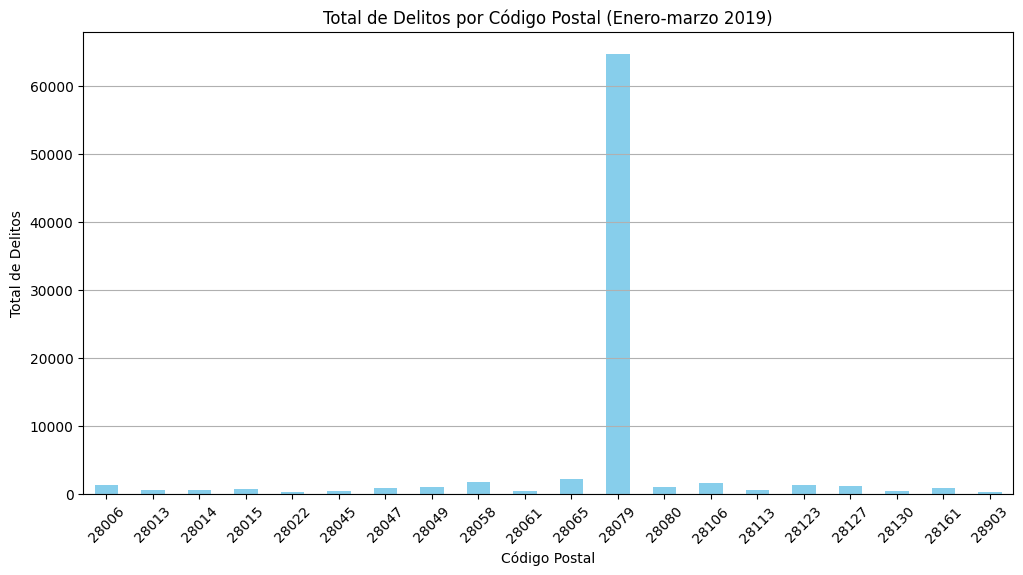

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar por código postal y calcular el total de delitos
delitos_por_cp = df.groupby('CP')['TOTAL INFRACCIONES PENALES en Enero-marzo 2019'].mean()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
delitos_por_cp.plot(kind='bar', color='skyblue')
plt.xlabel('Código Postal')
plt.ylabel('Total de Delitos')
plt.title('Total de Delitos por Código Postal (Enero-marzo 2019)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

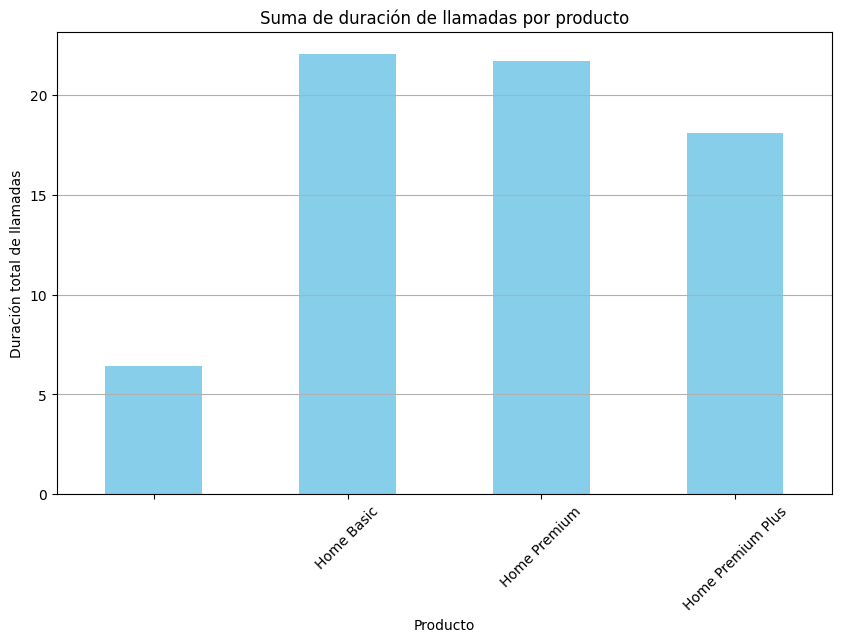

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Gráfico de barras de la suma de la duración de llamadas por producto
suma_duration_por_producto = df.groupby('Producto')['duration_call_mins'].mean()
suma_duration_por_producto.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.xlabel('Producto')
plt.ylabel('Duración total de llamadas')
plt.title('Suma de duración de llamadas por producto')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

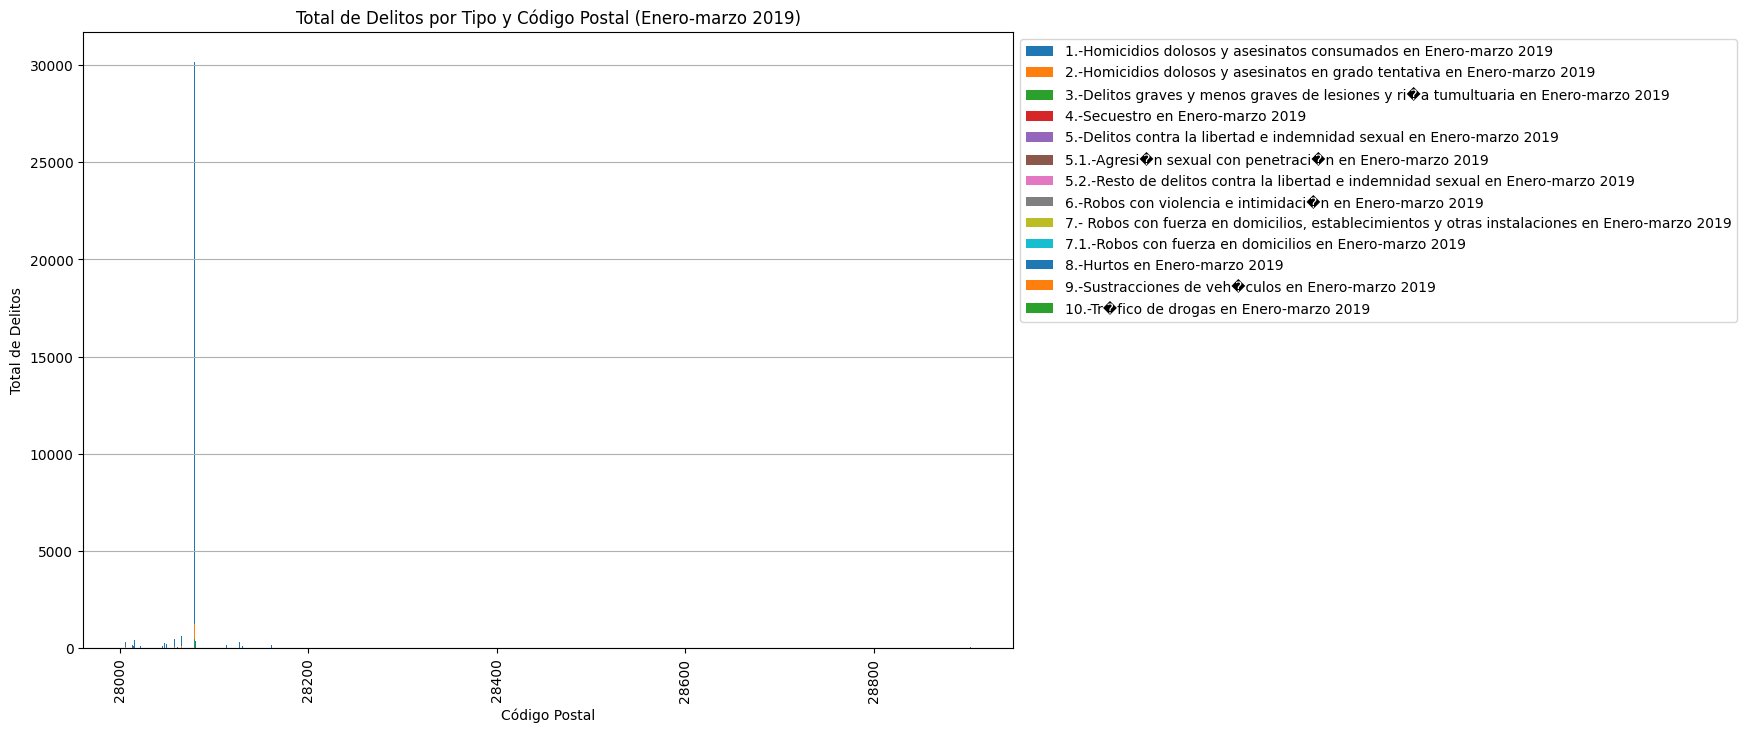

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
# Lista de tipos de delitos
tipos_delitos = ['1.-Homicidios dolosos y asesinatos consumados en Enero-marzo 2019', 
                 '2.-Homicidios dolosos y asesinatos en grado tentativa en Enero-marzo 2019', 
                 '3.-Delitos graves y menos graves de lesiones y ri�a tumultuaria en Enero-marzo 2019', 
                 '4.-Secuestro en Enero-marzo 2019', '5.-Delitos contra la libertad e indemnidad sexual en Enero-marzo 2019', 
                 '5.1.-Agresi�n sexual con penetraci�n en Enero-marzo 2019', 
                 '5.2.-Resto de delitos contra la libertad e indemnidad sexual en Enero-marzo 2019', 
                 '6.-Robos con violencia e intimidaci�n en Enero-marzo 2019', 
                 '7.- Robos con fuerza en domicilios, establecimientos y otras instalaciones en Enero-marzo 2019', 
                 '7.1.-Robos con fuerza en domicilios en Enero-marzo 2019', 
                 '8.-Hurtos en Enero-marzo 2019','9.-Sustracciones de veh�culos en Enero-marzo 2019', 
                 '10.-Tr�fico de drogas en Enero-marzo 2019']
# Crear un gráfico de barras para cada tipo de delito por c�digo postal
plt.figure(figsize=(12, 8))


for tipo in tipos_delitos:
    # Calcular la suma por código postal para cada tipo de delito
    df[tipo] = pd.to_numeric(df[tipo])
    total_por_tipo = df.groupby('CP')[tipo].mean()
    
    # Crear el gráfico de barras para el tipo de delito actual
    plt.bar(total_por_tipo.index, total_por_tipo, label=tipo)

plt.xlabel('Código Postal')
plt.ylabel('Total de Delitos')
plt.title('Total de Delitos por Tipo y Código Postal (Enero-marzo 2019)')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor visualización
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Mover la leyenda fuera del gráfico
plt.grid(axis='y')
plt.show()

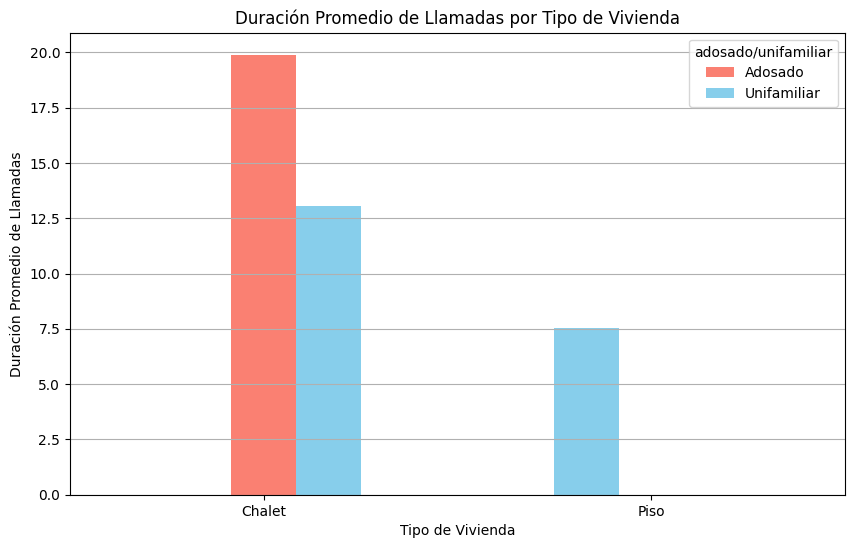

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular la duración promedio de llamadas para cada categoría de 'chalet/piso' y 'adosado/unifamiliar'
duracion_promedio = df.groupby(['chalet/piso', 'adosado/unifamiliar'])['duration_call_mins'].mean().unstack()

# Crear el gráfico de barras
duracion_promedio.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'])
plt.xlabel('Tipo de Vivienda')
plt.ylabel('Duración Promedio de Llamadas')
plt.title('Duración Promedio de Llamadas por Tipo de Vivienda')
plt.xticks(rotation=0)
plt.legend(title='adosado/unifamiliar', loc='upper right')
plt.grid(axis='y')
plt.show()

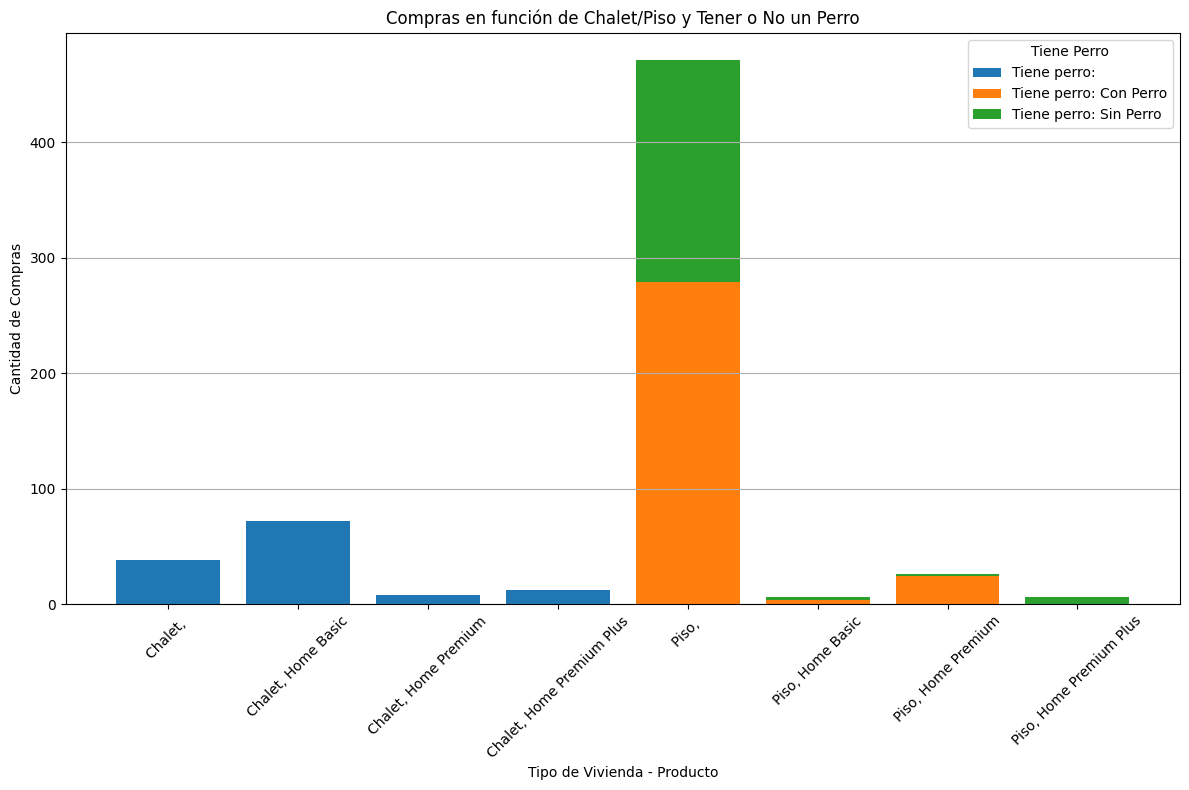

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear un DataFrame con el conteo de productos según si es chalet/piso y tiene perro o no
conteo_productos_perro = df.groupby(['chalet/piso', 'Producto', 'perro']).size().unstack().fillna(0)

# Convertir los índices MultiIndex a cadenas de texto para usarlos como etiquetas
conteo_productos_perro.index = [', '.join(map(str, index)) for index in conteo_productos_perro.index]

# Crear el gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(12, 8))

# Generar barras apiladas para cada tipo de producto
bottom = None
for producto in conteo_productos_perro.columns:
    ax.bar(conteo_productos_perro.index, conteo_productos_perro[producto], label=f'Tiene perro: {producto}', bottom=bottom)
    if bottom is None:
        bottom = conteo_productos_perro[producto].values
    else:
        bottom += conteo_productos_perro[producto].values

# Ajustes del gráfico
plt.xlabel('Tipo de Vivienda - Producto')
plt.ylabel('Cantidad de Compras')
plt.title('Compras en función de Chalet/Piso y Tener o No un Perro')
plt.xticks(rotation=45)
plt.legend(title='Tiene Perro', loc='upper right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

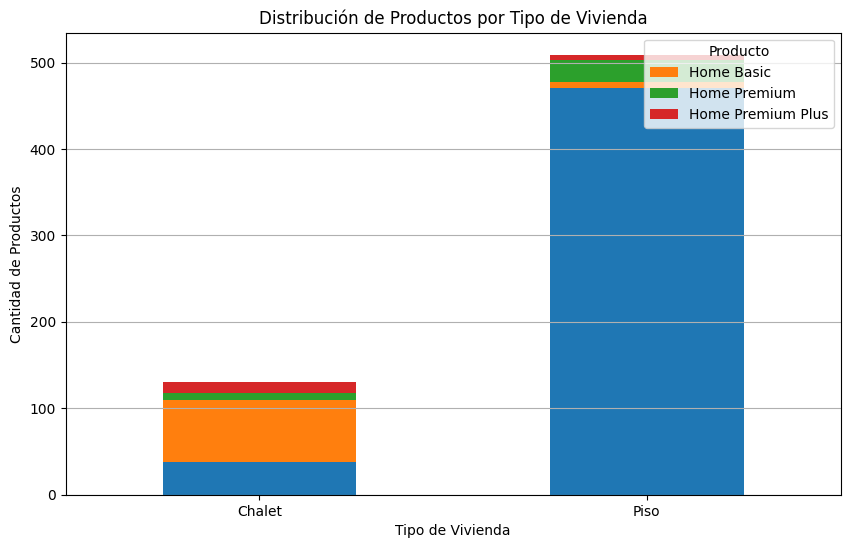

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear un DataFrame con el conteo de tipos de productos según si es chalet o piso
conteo_productos = df.groupby(['chalet/piso', 'Producto']).size().unstack()

# Crear el gráfico de barras apiladas
conteo_productos.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Tipo de Vivienda')
plt.ylabel('Cantidad de Productos')
plt.title('Distribución de Productos por Tipo de Vivienda')
plt.xticks(rotation=0)
plt.legend(title='Producto', loc='upper right')
plt.grid(axis='y')
plt.show()

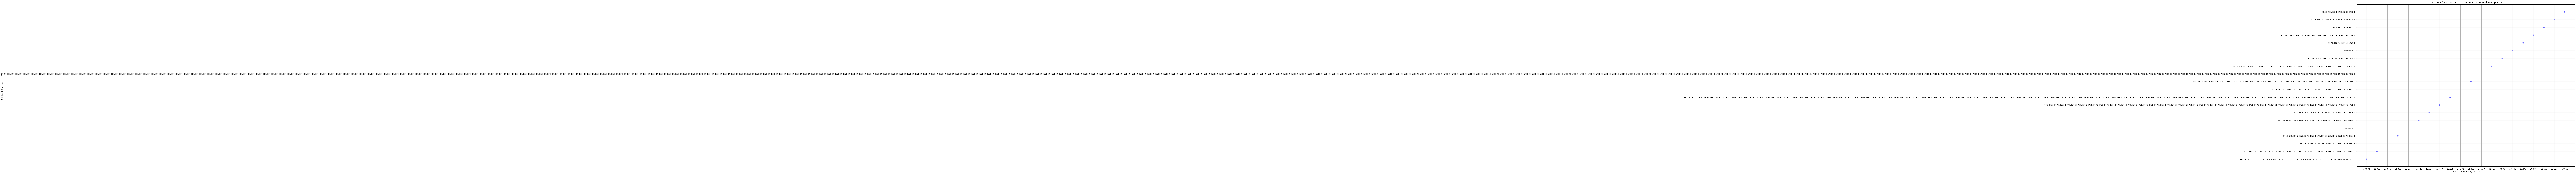

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar por código postal y calcular el total de infracciones y el total de 2019 por código postal
infracciones_por_CP = df.groupby('CP')['TOTAL INFRACCIONES PENALES en Enero-marzo 2020'].sum()
total_2019_por_CP = df.groupby('CP')['Total 2020'].max()

# Crear el gráfico de dispersión
plt.figure(figsize=(20, 15))
plt.scatter(total_2019_por_CP, infracciones_por_CP, alpha=0.5, color='blue')
plt.xlabel('Total 2019 por Código Postal')
plt.ylabel('Total de Infracciones en 2020')
plt.title('Total de Infracciones en 2020 en función de Total 2020 por CP')
plt.grid(True)
plt.show()

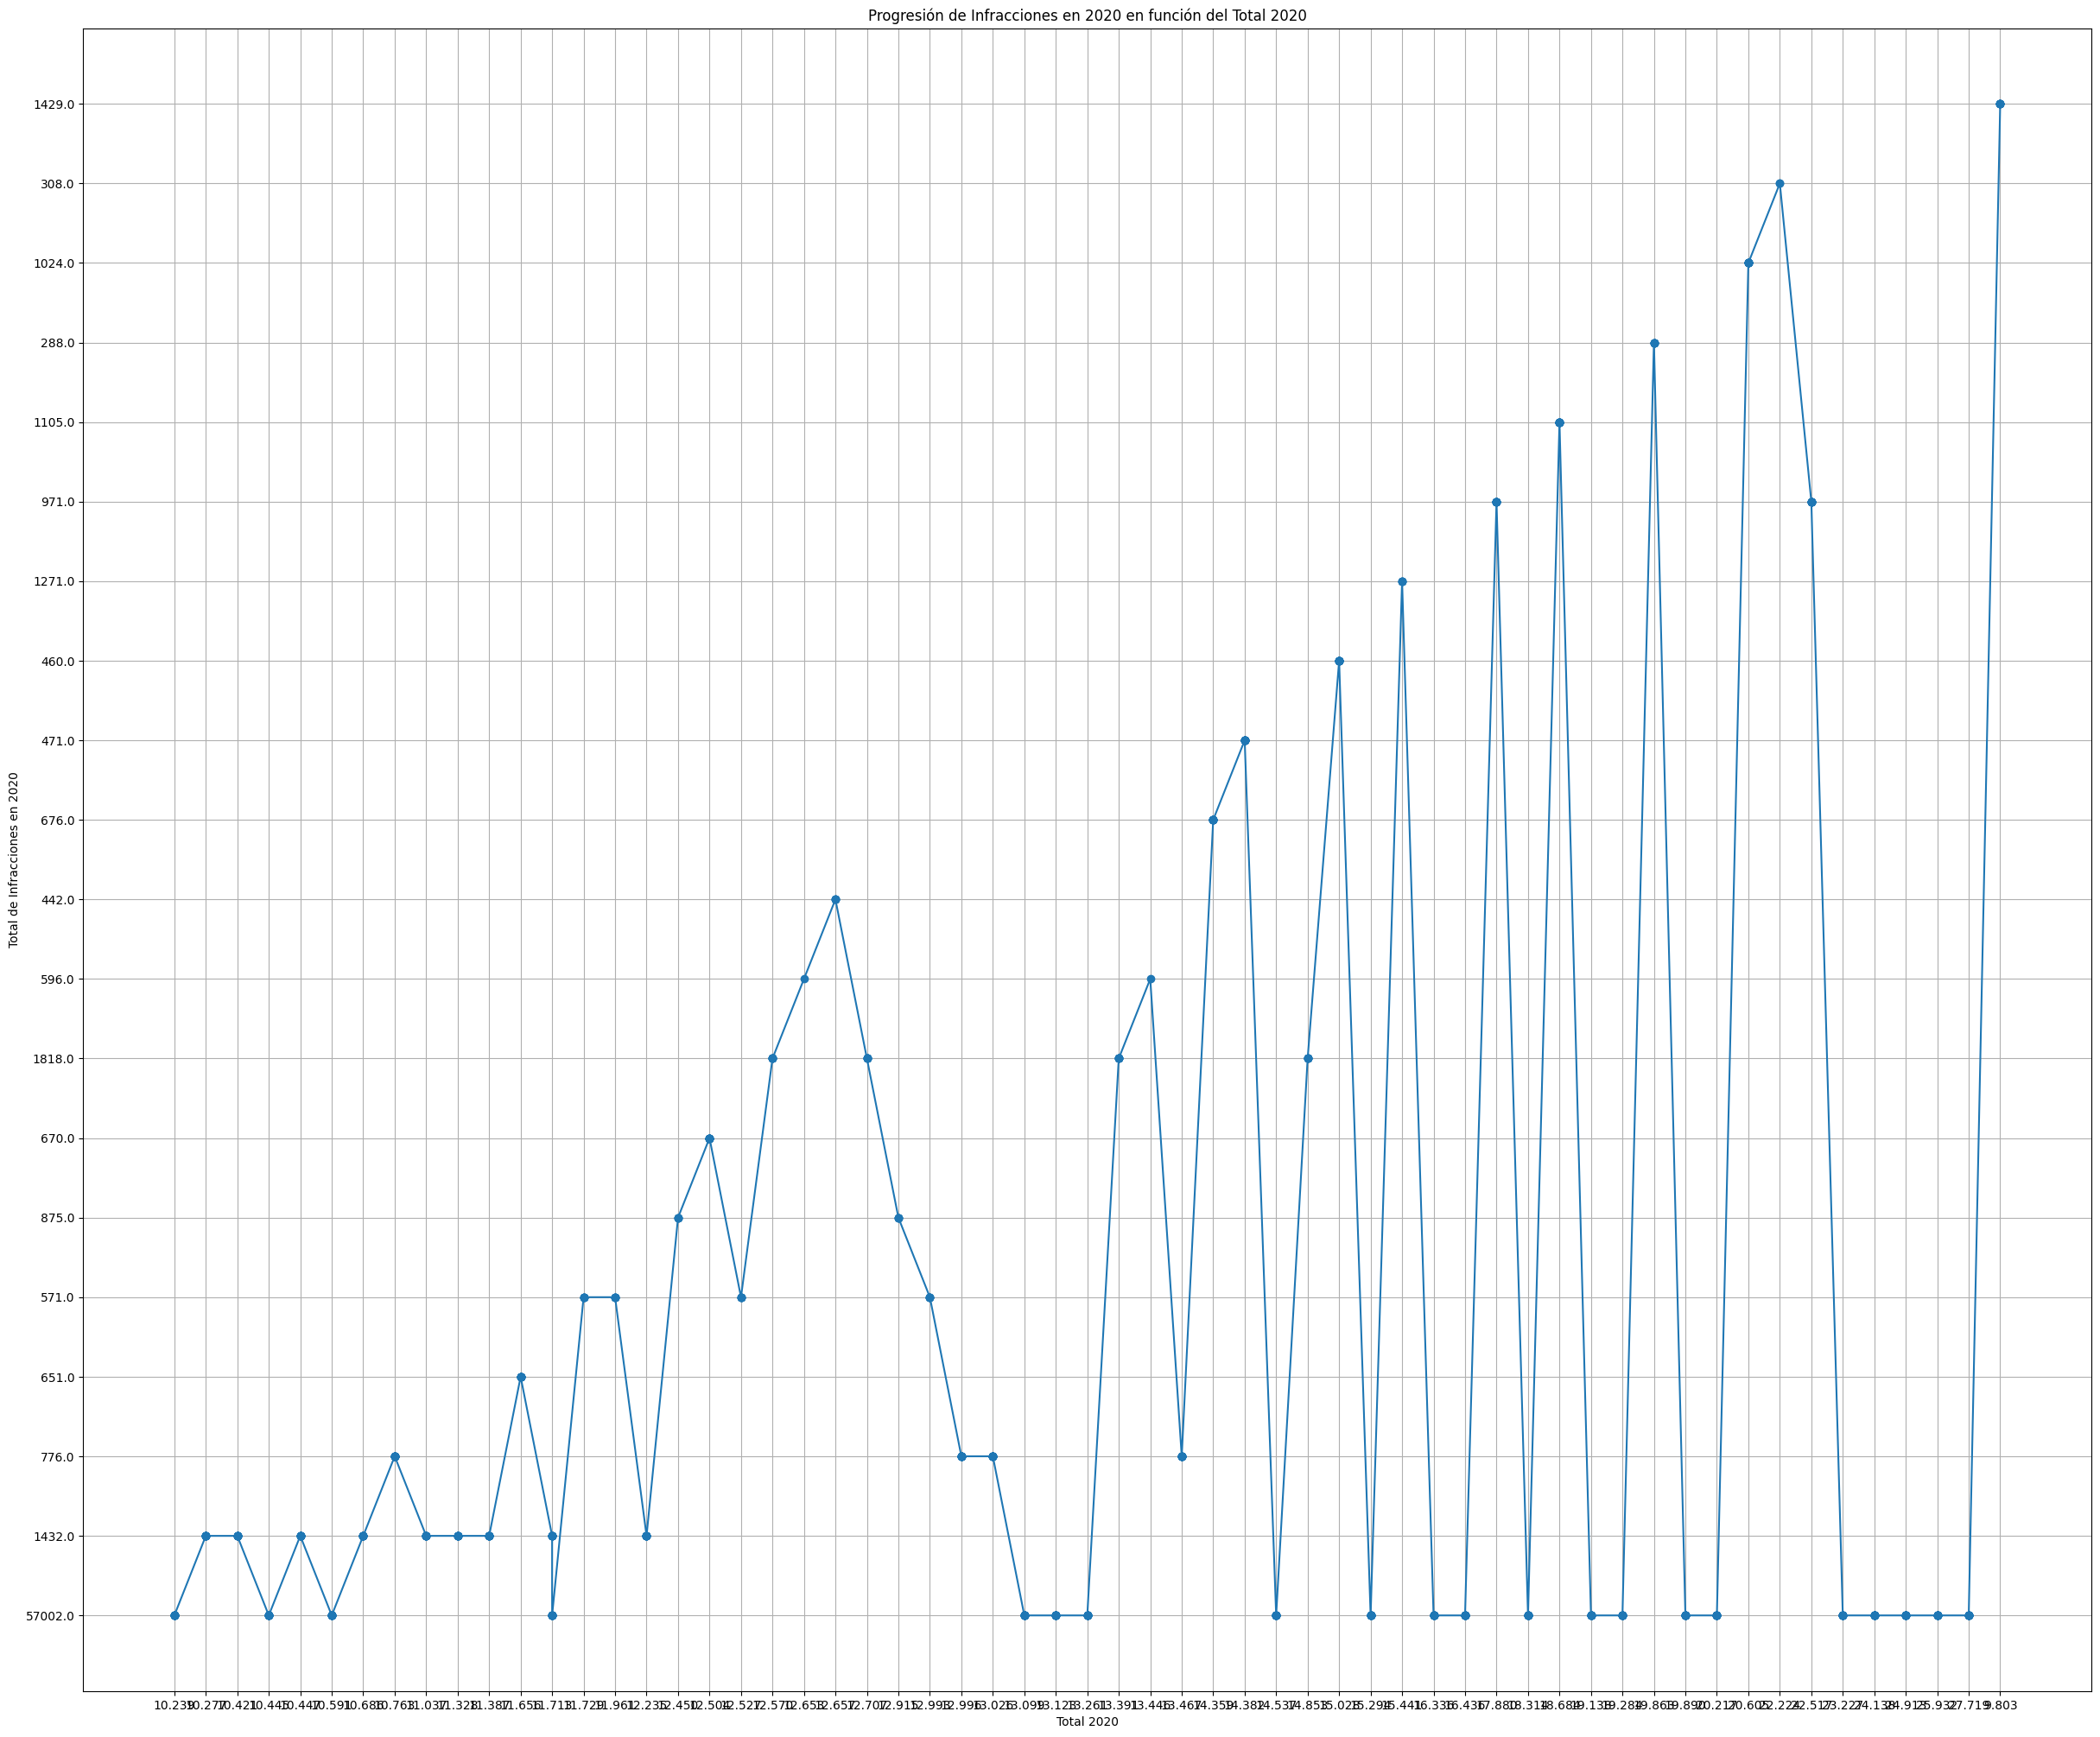

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
# Ordenar los datos por el total de 2020
datos_2020 = df.sort_values('Total 2020')

# Crear el gráfico de líneas
plt.figure(figsize=(30, 25))
plt.plot(datos_2020['Total 2020'], datos_2020['TOTAL INFRACCIONES PENALES en Enero-marzo 2020'], marker='o', linestyle='-')
plt.xlabel('Total 2020')
plt.ylabel('Total de Infracciones en 2020')
plt.title('Progresión de Infracciones en 2020 en función del Total 2020')
plt.grid(True)

plt.show()

<Figure size 3000x2500 with 0 Axes>

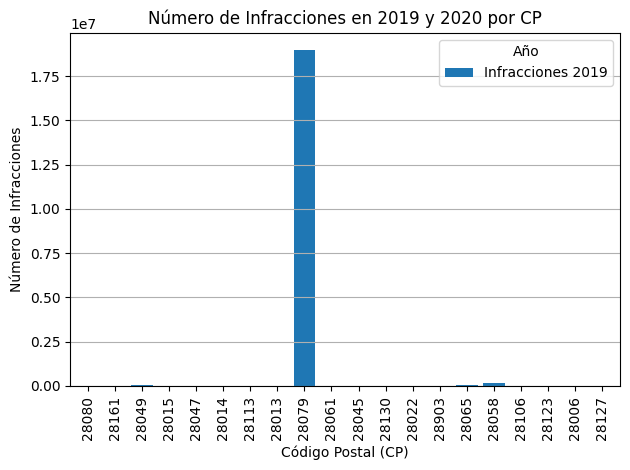

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular el número de infracciones por CP para cada año
infracciones_2019 = df.groupby('CP')['TOTAL INFRACCIONES PENALES en Enero-marzo 2019'].sum()
infracciones_2020 = df.groupby('CP')['TOTAL INFRACCIONES PENALES en Enero-marzo 2020'].sum()

# Unir los datos en un nuevo DataFrame
infracciones_por_CP = pd.concat([infracciones_2019, infracciones_2020], axis=1)
infracciones_por_CP.columns = ['Infracciones 2019', 'Infracciones 2020']

# Ordenar por la suma de infracciones en 2020 (para visualización)
infracciones_por_CP = infracciones_por_CP.sort_values('Infracciones 2020', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(30, 25))
infracciones_por_CP.plot(kind='bar', width=0.8)
plt.xlabel('Código Postal (CP)')
plt.ylabel('Número de Infracciones')
plt.title('Número de Infracciones en 2019 y 2020 por CP')
plt.legend(title='Año')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear un DataFrame con el conteo de productos según si es chalet/piso, tiene rejas o no
conteo_productos_rejas = df.groupby(['chalet/piso', 'Producto', 'rejas']).size().unstack().fillna(0)

# Obtener la lista de categorías de productos y rejas
categorias_productos = conteo_productos_rejas.index.get_level_values('Producto').unique()
categorias_rejas = conteo_productos_rejas.columns

# Crear un subplot para cada tipo de producto
fig, axs = plt.subplots(len(categorias_productos), 1, figsize=(8, 6 * len(categorias_productos)))

# Iterar sobre cada categoría de producto
for i, producto in enumerate(categorias_productos):
    # Filtrar los datos para el producto actual
    datos_producto = conteo_productos_rejas.loc[producto]
    
    # Crear el gráfico de tarta para el producto actual
    axs[i].pie(datos_producto.sum(), labels=categorias_rejas, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'Rejas en función de Chalet/Piso para el Producto: {producto}')
    axs[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()

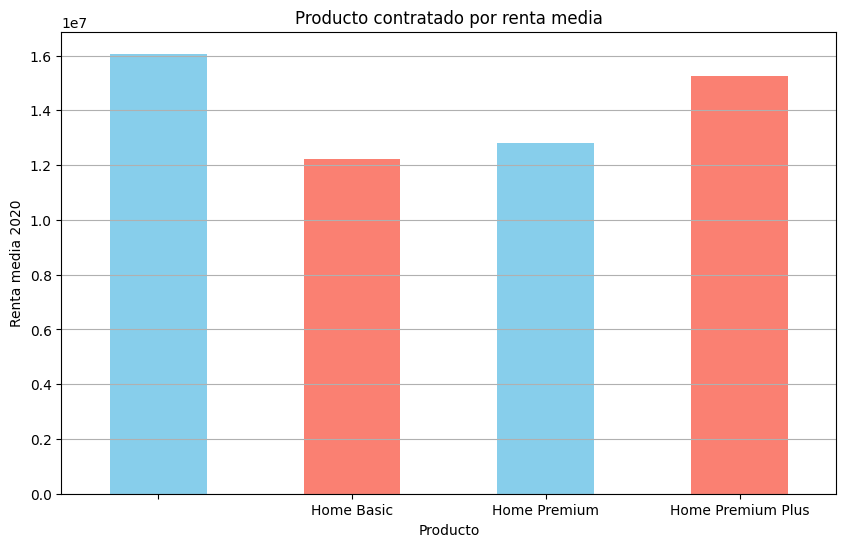

In [62]:
import matplotlib.pyplot as plt

df['Total 2020'] = pd.to_numeric(df['Total 2020'])*1000
producto_renta = df.groupby('Producto')['Total 2020'].mean()

producto_renta.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'])
plt.xlabel('Producto')
plt.ylabel('Renta media 2020')
plt.title('Producto contratado por renta media')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

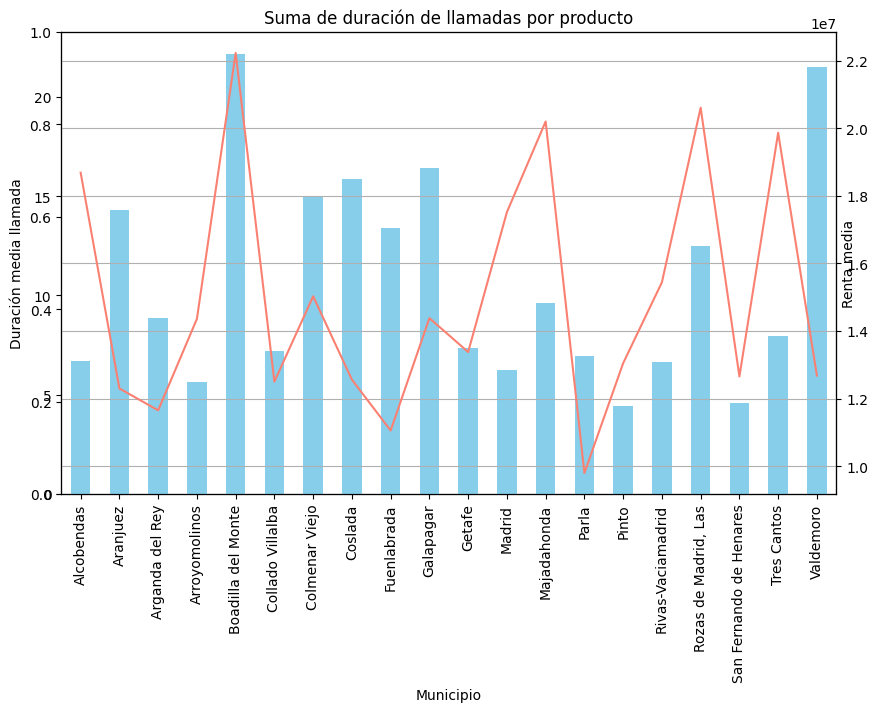

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# Gráfico de barras de la suma de la duración de llamadas por producto
suma_duration_por_producto = df.groupby('Municipio')['duration_call_mins'].mean()
total_2020_municipio = df.groupby('Municipio')['Total 2020'].mean()

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
suma_duration_por_producto.plot(kind='bar', color='skyblue', figsize=(10, 6))
total_2020_municipio.plot(kind='line', color='salmon', figsize=(10, 6), secondary_y=True)

ax1.set_xlabel('Municipio')
ax1.tick_params(axis='x', rotation=90)
ax1.set_ylabel('Duración media llamada')
ax2.set_ylabel('Renta media')

plt.title('Suma de duración de llamadas por producto')
plt.grid(axis='y')
plt.show()